In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from scipy.stats import norm   
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import time 


ModuleNotFoundError: No module named 'mlxtend'

In [ ]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(df_train.columns)
print(df_train['SalePrice'].describe())

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

(array([  5.,   4.,   8.,  10.,  39.,  37.,  45.,  84.,  97., 135., 134.,
         93.,  86.,  94.,  92.,  60.,  52.,  50.,  46.,  44.,  29.,  26.,
         25.,  27.,  17.,  10.,  11.,  19.,  11.,  11.,   5.,   4.,   6.,
          7.,   7.,   5.,   3.,   2.,   2.,   4.,   1.,   2.,   1.,   1.,
          0.,   1.,   0.,   0.,   1.,   0.,   2.,   0.,   0.,   1.,   0.,
          0.,   1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2.]),
 array([ 34900.        ,  45187.14285714,  55474.28571429,  65761.42857143,
         76048.57142857,  86335.71428571,  96622.85714286, 106910.        ,
        117197.14285714, 127484.28571429, 137771.42857143, 148058.57142857,
        158345.71428571, 168632.85714286, 178920.        , 189207.14285714,
        199494.28571429, 209781.42857143, 220068.57142857, 230355.71428571,
        240642.85714286, 250930.        , 261217.14285714, 271504.28571429,
        281791.42857143, 292078.57142857, 302365.71428571, 312652.

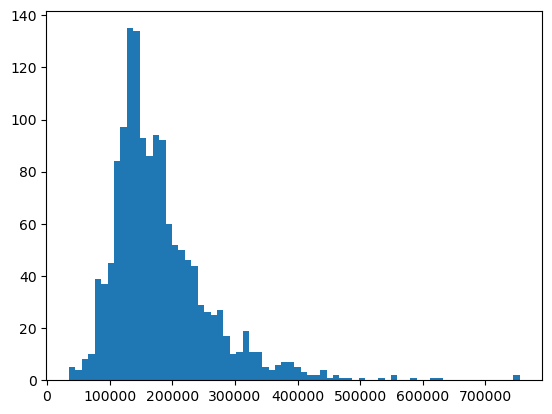

In [ ]:
plt.hist(df_train['SalePrice'], bins = 70)

fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].hist(df_train['SalePrice'], bins=50)
axes[0].set_title('SalePrice')
axes[0].set_xticks(range(0, 800000, 175000))
log_price = np.log(df_train['SalePrice'])
axes[1].hist(log_price, bins=50)
axes[1].set_title('Log SalePrice')
axes[1].set_xticks(range(10, 15))
plt.show()

C:\Users\Martin Le\AppData\Local\Temp\ipykernel_9656\1584787128.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_train.corr()


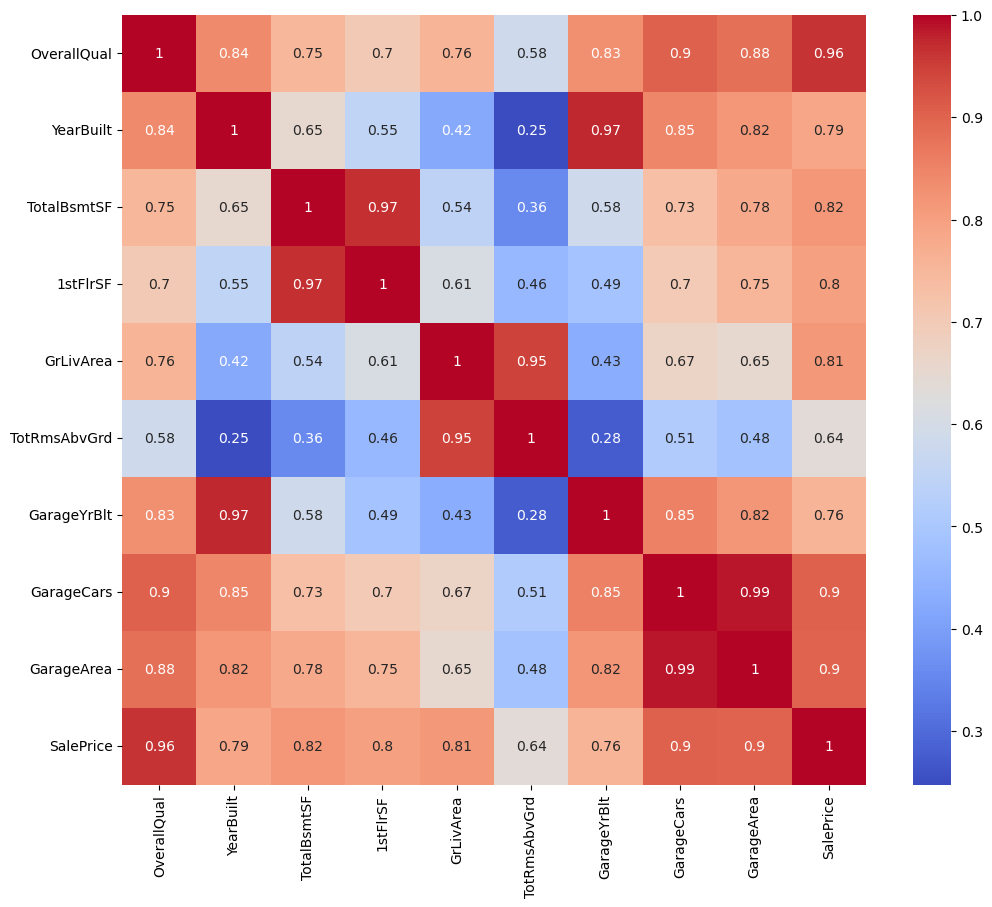

In [ ]:
corr_matrix = df_train.corr()   
threshold = 0.7
mask = np.eye(corr_matrix.shape[0], dtype=bool) 
max_corr = corr_matrix.where(~mask).abs().max()
valid_col = max_corr > threshold
filtered_df = corr_matrix.loc[:, valid_col]
filtered_corr = filtered_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm')
plt.show()

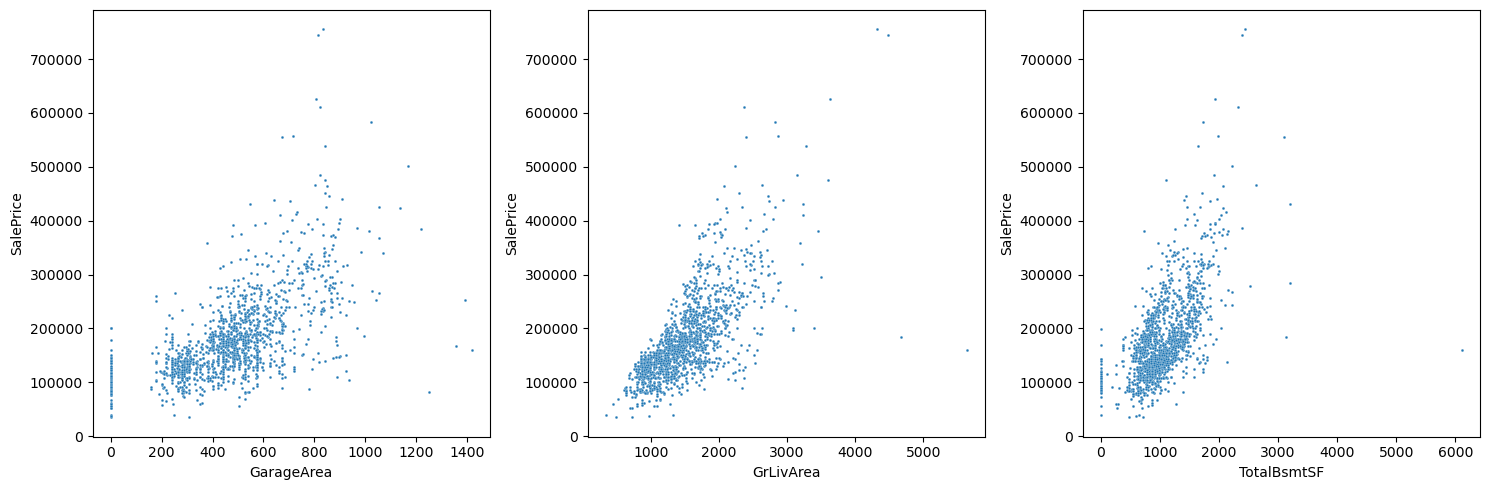

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(15,5))
s= 4
sns.scatterplot(x='GarageArea', y='SalePrice', data=df_train, ax=ax[0],s= s)
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train, ax=ax[1],s= s)
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=df_train, ax=ax[2],s= s)
plt.tight_layout()
plt.show()

In [ ]:

#missing data
whole_data = pd.concat((df_train, df_test)).reset_index(drop=True)
whole_data.drop(['SalePrice'], axis=1, inplace=True)

missing_values_train =  df_train.isnull().sum().sort_values(ascending=False)
missing_values_train = missing_values_train[missing_values_train  > 0]
missing_values_whole = whole_data.isnull().sum().sort_values(ascending=False)
missing_values_whole = missing_values_whole[missing_values_whole  > 0]
print(missing_values_whole)

PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
FireplaceQu     1420
LotFrontage      486
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageCond       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
GarageCars         1
KitchenQual        1
BsmtFinSF1         1
SaleType           1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
Electrical         1
dtype: int64


In [ ]:
#dealing with missing data
var_cat = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'MasVnrType']
for i in var_cat:
    whole_data[i] = whole_data[i].fillna('None')
var_num = ['LotFrontage','GarageYrBlt' ,'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea']
for i in var_num:
    whole_data[i] = whole_data[i].fillna(0)
var_catmod = ['MSZoning', 'Utilities', 'Functional', 'Exterior1st', 'Electrical', 'Exterior2nd', 'KitchenQual', 'SaleType']
for i in var_catmod:
    whole_data[i] = whole_data[i].fillna(whole_data[i].mode()[0])
whole_data["MSZonig"] = whole_data["MSZoning"].fillna(whole_data["MSZoning"].mode()[0])
missing_values_whole = whole_data.isnull().sum().sort_values(ascending=False)
missing_values_whole = missing_values_whole[missing_values_whole  > 0]
print(missing_values_whole)
whole_data = whole_data.drop(['GarageYrBlt', 'PoolQC', 'Utilities'], axis=1)
#transforming some numerical variables that are really categorical
whole_data_dummy = pd.get_dummies(whole_data)
print(whole_data_dummy.shape)


Series([], dtype: int64)
(2919, 301)


In [ ]:
#skewed features
numeric_cols = whole_data_dummy.select_dtypes(include=[np.number]).columns

threshold = 0.5
for col in numeric_cols:
    skewness = whole_data_dummy[col].skew()
    if skewness > threshold:
        whole_data_dummy[col] = np.log1p(whole_data_dummy[col])  # using log1p instead of log to handle zero values
